In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# our hyperparameters
input_size = 784 # since we are flattening 28x28 images
hidden_size = 100
num_classes = 10 # digits 0-9
num_epochs = 2
batch_size = 100
learning_rate = 0.001

torch.Size([100, 1, 28, 28]) torch.Size([100])


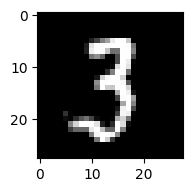

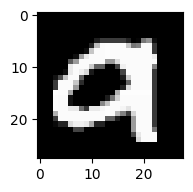

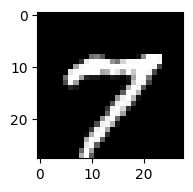

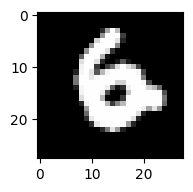

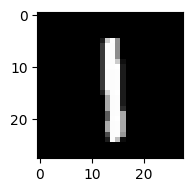

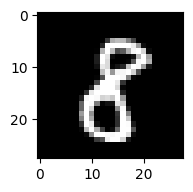

In [13]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.__next__()

print(samples.shape, labels.shape)

for i in range(6):
  plt.subplot(2,3, i+1) # 2 rows, 3 columns, index i+1
  plt.imshow(samples[i][0], cmap='gray') # '0' to access the first channel
  plt.show()

In [14]:
# now we will create a fully-connected neural network with one hidden layer in order to be able to classify these images
class NeuralNetwork(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes): # num_classes is basically our ouput size
    super(NeuralNetwork, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out # no need to return softmax here since the CE loss we add in later will take care of that automatically

In [15]:
# lets create an instance of our model
model = NeuralNetwork(input_size, hidden_size, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


# training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # the size is 100, 1, 28, 28
    # we set out input size of tensor to be 100, 784
    images = images.reshape(-1, 28*28).to(device) # push it to the GPU (if GPU available)
    labels = labels.to(device) # push it to the GPU (if GPU available)

    # forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backward pass
    optimizer.zero_grad() # clear out previous gradients
    loss.backward() # do the backprop
    optimizer.step() # update our parameters

    if (i+1) % 100 == 0:
      print(f"this is epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss={loss.item():.4f}")

# testing loop
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  for images, labels in test_loader: # going through all the batches
    images = images.reshape(-1, 28*28).to(device) # push it to the GPU (if GPU available)
    labels = labels.to(device) # push it to the GPU (if GPU available)
    outputs = model(images)

    # value, index
    _, predictions = torch.max(outputs, 1) # finding the max indices along the second dimension (dim=1)
    n_samples += labels.shape[0] # gives us number of samples in current batch (so should be 100)
    n_correct += (predictions==labels).sum().item()

  
  accuracy = 100 * n_correct/n_samples
  print(f'Accuracy = {accuracy}')

this is epoch 1 / 2, step 100/600, loss=0.5013
this is epoch 1 / 2, step 200/600, loss=0.3297
this is epoch 1 / 2, step 300/600, loss=0.1822
this is epoch 1 / 2, step 400/600, loss=0.3775
this is epoch 1 / 2, step 500/600, loss=0.3855
this is epoch 1 / 2, step 600/600, loss=0.2240
this is epoch 2 / 2, step 100/600, loss=0.2028
this is epoch 2 / 2, step 200/600, loss=0.3065
this is epoch 2 / 2, step 300/600, loss=0.2736
this is epoch 2 / 2, step 400/600, loss=0.1174
this is epoch 2 / 2, step 500/600, loss=0.3248
this is epoch 2 / 2, step 600/600, loss=0.1733
Accuracy = 94.97
